In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import table

import pandas as pd

#https://github.com/jobovy/gaia_tools
import gaia_tools.load as gload
from gaia_tools import xmatch
import read_data as rd

Load catalogs with Jo Bovy's code

In [2]:
tgas_cat= gload.tgas()

In [3]:
tgas_tab = table.Table(tgas_cat)
df = tgas_tab.to_pandas()

In [4]:
df.columns

Index([u'hip', u'tycho2_id', u'solution_id', u'source_id', u'random_index',
       u'ref_epoch', u'ra', u'ra_error', u'dec', u'dec_error', u'parallax',
       u'parallax_error', u'pmra', u'pmra_error', u'pmdec', u'pmdec_error',
       u'ra_dec_corr', u'ra_parallax_corr', u'ra_pmra_corr', u'ra_pmdec_corr',
       u'dec_parallax_corr', u'dec_pmra_corr', u'dec_pmdec_corr',
       u'parallax_pmra_corr', u'parallax_pmdec_corr', u'pmra_pmdec_corr',
       u'astrometric_n_obs_al', u'astrometric_n_obs_ac',
       u'astrometric_n_good_obs_al', u'astrometric_n_good_obs_ac',
       u'astrometric_n_bad_obs_al', u'astrometric_n_bad_obs_ac',
       u'astrometric_delta_q', u'astrometric_excess_noise',
       u'astrometric_excess_noise_sig', u'astrometric_primary_flag',
       u'astrometric_relegation_factor', u'astrometric_weight_al',
       u'astrometric_weight_ac', u'astrometric_priors_used',
       u'matched_observations', u'duplicated_source',
       u'scan_direction_strength_k1', u'scan_directio

In [5]:
df[['parallax_pmdec_corr','parallax_pmra_corr','parallax','parallax_error']].describe()

,parallax_pmdec_corr,parallax_pmra_corr,parallax,parallax_error
count,2.057050e+06,2.057050e+06,2.057050e+06,2.057050e+06
mean,-1.596101e-01,2.463325e-02,2.477627e+00,3.850052e-01
std,4.844652e-01,6.398656e-01,2.910183e+00,1.699272e-01
min,-9.968984e-01,-9.985727e-01,-2.481995e+01,2.039740e-01
25%,-5.673988e-01,-6.121245e-01,1.030510e+00,2.681603e-01
50%,-1.608538e-01,4.522673e-02,1.780198e+00,3.220124e-01
75%,1.813491e-01,6.500711e-01,3.015706e+00,4.360010e-01
max,9.962620e-01,9.987622e-01,2.958036e+02,9.999985e-01


<IPython.core.display.Javascript object>


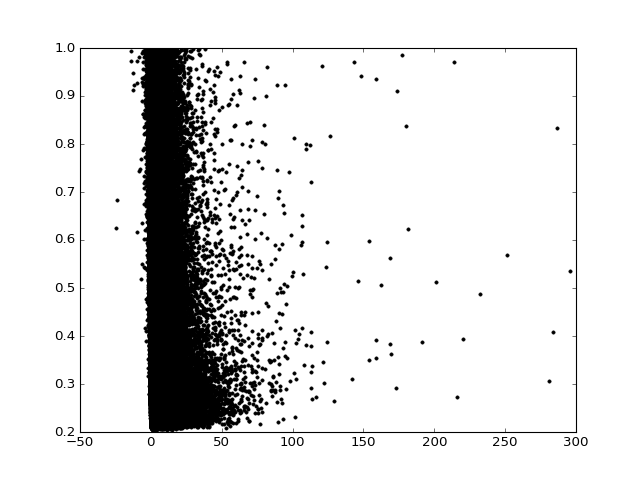

In [6]:
plt.figure()
plt.plot(df['parallax'],df['parallax_error'],'k.')

In [7]:
df['distance'] = 1./df['parallax'] #in kpc

<IPython.core.display.Javascript object>


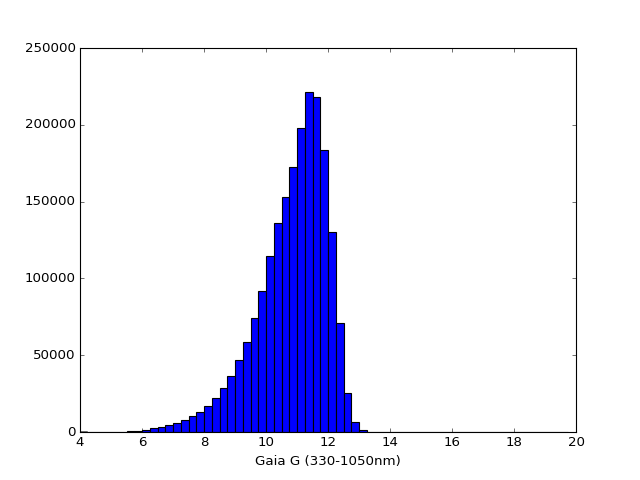

In [8]:
plt.figure()
plt.hist(df['phot_g_mean_mag'],bins=np.arange(4,20,.25))
plt.xlabel('Gaia G (330-1050nm)')

In [9]:
def contourbin(x,y,binx,biny,ax=None,**kwargs):
    h,xe,ye = np.histogram2d(np.array(x),np.array(y),bins=[binx,biny])
    xmid = (xe[1:]+xe[:-1])/2.0
    ymid = (ye[1:]+ye[:-1])/2.0
    X, Y = np.meshgrid(xmid,ymid)
    ax.contour(X,Y,h.T,**kwargs)

<IPython.core.display.Javascript object>


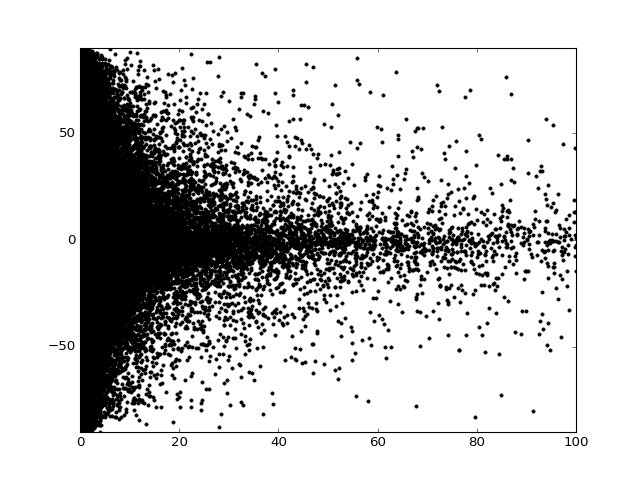

In [10]:
fig,ax = plt.subplots()
ii = np.logical_and(df['distance'] < 100, df['distance'] >= 0)
plt.plot(df[ii]['distance'],df[ii]['b'],'k.')
binx = np.arange(0,100,10)
biny = np.arange(-90,90,10)
contourbin(df[ii]['distance'],df[ii]['b'],binx,biny,ax,colors='red')

# With other catalogs

In [11]:
galah_cat = gload.galah()
rave_cat = gload.rave()

In [12]:
rave_cat.colnames

['Name',
 'RAVE',
 'RAdeg',
 'DEdeg',
 'GLON',
 'GLAT',
 'HRV',
 'e_HRV',
 'R',
 'hcp',
 'wcp',
 'HRVsky',
 'e_HRVsky',
 'Rsky',
 'cRV',
 'ZPFLAG',
 'SNRS',
 'TYCHO2',
 'distT2',
 'XT2',
 'pmRAT2',
 'e_pmRAT2',
 'pmDET2',
 'e_pmDET2',
 'UCAC2',
 'distU2',
 'XU2',
 'pmRAU2',
 'e_pmRAU2',
 'pmDEU2',
 'e_pmDEU2',
 'UCAC3',
 'distU3',
 'XU3',
 'pmRAU3',
 'e_pmRAU3',
 'pmDEU3',
 'e_pmDEU3',
 'UCAC4',
 'distU4',
 'XU4',
 'pmRAU4',
 'e_pmRAU4',
 'pmDEU4',
 'e_pmDEU4',
 'PPMXL',
 'distP',
 'XP',
 'pmRAP',
 'e_pmRAP',
 'pmDEP',
 'e_pmDEP',
 'Obsdate',
 'Field',
 'Plate',
 'Fiber',
 'TeffK',
 'e_TeffK',
 'loggK',
 'e_loggK',
 '[M/H]K',
 'c[M/H]K',
 'e_[M/H]K',
 'SNRK',
 'QK',
 '[Al/H]',
 'o_Al',
 '[Si/H]',
 'o_Si',
 '[Fe/H]',
 'o_Fe',
 '[Ti/H]',
 'o_Ti',
 '[Ni/H]',
 'o_Ni',
 '[Mg/H]',
 'o_Mg',
 'CHISQc',
 'TeffS',
 'loggS',
 '[a/Fe]S',
 '2MASS',
 'dist2',
 'X2',
 'Jmag2',
 'e_Jmag2',
 'Hmag2',
 'e_Hmag2',
 'Kmag2',
 'e_Kmag2',
 'DENIS',
 'distD',
 'XD',
 'ImagD',
 'e_ImagD',
 'JmagD',
 'e_JmagD'

<IPython.core.display.Javascript object>


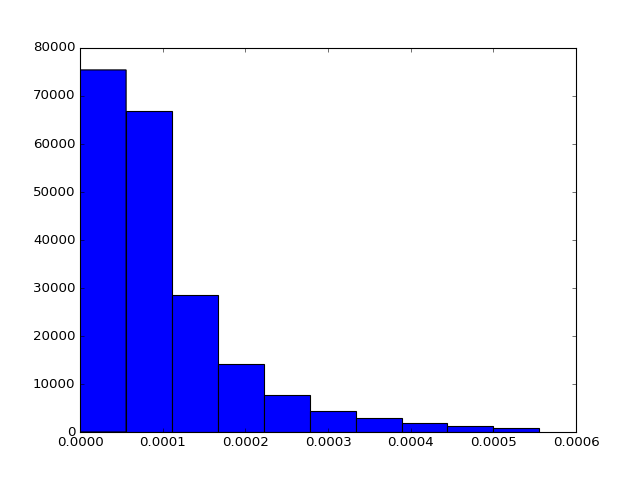

482194 203833
2057050 0.0990899589218


In [13]:
m1,m2,sep = xmatch.xmatch(tgas_cat,rave_cat,colRA1='ra',colDec1='dec',colRA2='RAdeg',colDec2='DEdeg')
tgas_rave = tgas_cat[m1]
rave_tgas = rave_cat[m2]
plt.figure()
plt.hist(sep)
print len(rave_cat), len(rave_tgas)
print len(tgas_cat), len(tgas_rave)/float(len(tgas_cat))

<IPython.core.display.Javascript object>


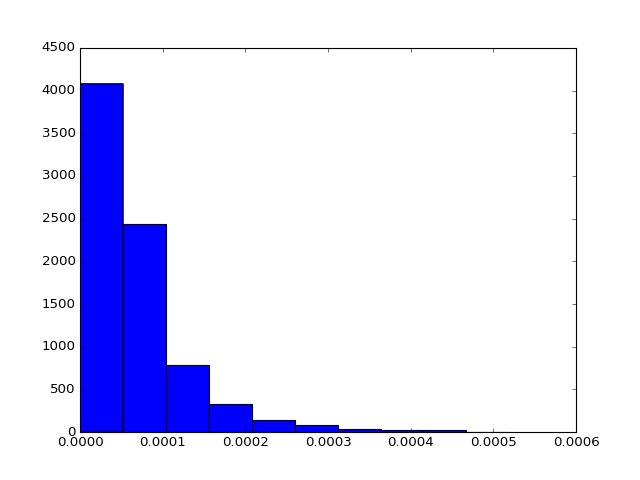

10680 7919
2057050 0.00384968765951


In [14]:
m1,m2,sep = xmatch.xmatch(tgas_cat,galah_cat,colRA1='ra',colDec1='dec',colRA2='RA',colDec2='dec')
tgas_galah= tgas_cat[m1]
galah_tgas= galah_cat[m2]
plt.figure()
plt.hist(sep)
print len(galah_cat), len(galah_tgas)
print len(tgas_cat), len(tgas_galah)/float(len(tgas_cat))

In [15]:
galah_cat.colnames

['galah_id',
 'tycho2_id',
 'tmass_ID',
 'RA',
 'dec',
 'Teff',
 'logg',
 '[Fe/H]',
 '[alpha/Fe]',
 'vrad',
 '(m-M)v',
 'E(B-V)']

In [25]:
tycho2_cat,m2 = xmatch.cds(tgas_cat, xcat='vizier:Tycho2',colRA='ra',colDec='dec',savefilename="tycho2.dat")
tgas_tycho2 = tgas_cat[m2]

KeyboardInterrupt: 

In [ ]:
apass_cat,m2 = xmatch.cds(tgas_cat, xcat='vizier:')